<a href="https://colab.research.google.com/github/Priyanka22062001/Priyanka_INFO5731_Spring2025/blob/main/Mada_Priyanka_Assignment_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [10]:
import pandas as pd
from collections import defaultdict

def generate_ngrams(texts, n):
    """Generate n-grams from a list of texts."""
    ngrams = defaultdict(int)
    for text in texts:
        words = text.split()
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i+n])
            ngrams[ngram] += 1
    return ngrams

def main(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Print column names to verify
    print("Column names in dataset:", data.columns)

    # Ensure correct column name (modify if needed)
    expected_column = 'cleaned_imdb_reviews'  # Change based on actual column name

    # Rename column if necessary
    if expected_column not in data.columns:
        data.rename(columns={data.columns[0]: expected_column}, inplace=True)  # Assuming first column is the target one

    # Drop NaN values to avoid errors
    data.dropna(subset=[expected_column], inplace=True)

    # Extract the column as a list
    texts = data[expected_column].astype(str).tolist()

    # Generate and count bigrams (N=2)
    bigrams = generate_ngrams(texts, n=2)

    # Generate and count trigrams (N=3)
    trigrams = generate_ngrams(texts, n=3)

    # Sort n-grams by frequency in descending order
    sorted_bigrams = sorted(bigrams.items(), key=lambda x: x[1], reverse=True)
    sorted_trigrams = sorted(trigrams.items(), key=lambda x: x[1], reverse=True)

    # Display the top 100 most frequent bigrams
    print("\nTop 100 most frequent bigrams and their counts:")
    for ngram, count in sorted_bigrams[:100]:
        print(f"{ngram}: {count}")

    # Display the top 100 most frequent trigrams
    print("\nTop 100 most frequent trigrams and their counts:")
    for ngram, count in sorted_trigrams[:100]:
        print(f"{ngram}: {count}")

# Set file path (update if needed)
file_path = "/content/cleaned_imdb_reviews (1).csv"  # Ensure the file exists
main(file_path)


Column names in dataset: Index(['review', 'cleaned_review'], dtype='object')

Top 100 most frequent bigrams and their counts:
('of', 'the'): 1442
('the', 'best'): 698
('is', 'a'): 632
('The', 'Dark'): 610
('in', 'the'): 577
('Dark', 'Knight'): 563
('and', 'the'): 522
('this', 'movie'): 511
('to', 'the'): 507
('the', 'film'): 474
('one', 'of'): 461
('is', 'the'): 413
('Heath', 'Ledger'): 406
('with', 'the'): 399
('to', 'be'): 382
('the', 'Joker'): 349
('this', 'film'): 340
('the', 'movie'): 336
('on', 'the'): 321
('"The', 'Dark'): 298
('movie', 'is'): 288
('as', 'the'): 281
('it', 'is'): 268
('Knight', 'is'): 264
('Dark', 'Knight"'): 264
('This', 'is'): 263
('in', 'this'): 263
('for', 'the'): 253
('as', 'a'): 246
('I', 'was'): 243
('this', 'is'): 237
('Heath', "Ledger's"): 233
('Christian', 'Bale'): 231
('it', 'was'): 230
('film', 'is'): 227
('I', 'have'): 217
('and', 'a'): 213
('Christopher', 'Nolan'): 209
('was', 'a'): 205
('comic', 'book'): 201
('of', 'all'): 199
('Batman', 'is'): 18

In [14]:
import pandas as pd
from collections import defaultdict

# Load the dataset
file_path = '/content/cleaned_imdb_reviews (1).csv'  # Updated file path
data = pd.read_csv(file_path)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(texts):
    word_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    bigram_probabilities = {}

    # Count occurrences of each word and each bigram
    for text in texts:
        words = text.split()
        for i in range(len(words) - 1):
            word_counts[words[i]] += 1
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] += 1
        # Count the last word in the text
        if words:
            word_counts[words[-1]] += 1

    # Calculate probabilities using count(w2, w1) / count(w1)
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        bigram_probabilities[bigram] = count / word_counts[w1]

    return bigram_probabilities

# Ensure correct column name (modify if needed)
expected_column = 'cleaned_imdb_reviews'  # Modify based on actual column name

# Rename column if necessary
if expected_column not in data.columns:
    data.rename(columns={data.columns[0]: expected_column}, inplace=True)

# Drop NaN values to avoid errors
data.dropna(subset=[expected_column], inplace=True)

# Extract the column as a list (limit to 100 reviews)
texts = data[expected_column].astype(str).tolist()[:100]  # Limit to 100 reviews

# Compute bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(texts)

# Display a sample of calculated bigram probabilities
sample_bigrams = list(bigram_probabilities.items())[:100]  # Show top 100 bigrams
print("\nSample Bigram Probabilities:")
for (w1, w2), prob in sample_bigrams:
    print(f"P({w2} | {w1}) = {prob:.4f}")



Sample Bigram Probabilities:
P(movie | Best) = 0.7500
P(ever. | movie) = 0.0276
P(Heath | ever.) = 0.3333
P(ledger's | Heath) = 0.0316
P(work | ledger's) = 1.0000
P(is | work) = 0.3333
P(phenomenal | is) = 0.0077
P(no | phenomenal) = 0.6000
P(words...... | no) = 0.1250
P(movie | This) = 0.2414
P(is | movie) = 0.1271
P(a | is) = 0.1031
P(work | a) = 0.0073
P(of | work) = 0.3333
P(art. | of) = 0.0072
P(The | art.) = 1.0000
P(finest | The) = 0.0189
P(sequel | finest) = 1.0000
P(ever | sequel) = 0.7500
P(made. | ever) = 0.2105
P(I | made.) = 0.2143
P(don't | I) = 0.0254
P(think | don't) = 0.2000
P(we | think) = 0.0968
P(will | we) = 0.2800
P(see | will) = 0.0638
P(another | see) = 0.0698
P(movie | another) = 0.3750
P(like | movie) = 0.0166
P(this | like) = 0.1463
P(for | this) = 0.0133
P(a | for) = 0.0662
P(long | a) = 0.0170
P(time. | long) = 0.2632
P(Heath | time.) = 0.3333
P(Ledger's | Heath) = 0.1684
P(Joker | Ledger's) = 0.1852
P(is | Joker) = 0.1587
P(the | is) = 0.1134
P(best | the

In [26]:
import pandas as pd
import spacy
from collections import Counter

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def load_data(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def extract_noun_phrases(texts):
    """Extract noun phrases, lemmatized, and lowercased from a list of texts."""
    noun_phrases = []
    for text in texts:
        doc = nlp(text)
        noun_phrases.extend([chunk.root.lemma_.lower() for chunk in doc.noun_chunks])  # Lemmatized root words
    return noun_phrases

def calculate_relative_probabilities(texts):
    """Calculate relative probabilities of noun phrases in each review."""
    # Extract noun phrases for the entire dataset
    all_noun_phrases = extract_noun_phrases(texts)
    global_frequencies = Counter(all_noun_phrases)  # Count noun phrase occurrences
    max_global_frequency = max(global_frequencies.values())  # Max frequency across dataset

    # Calculate frequencies of noun phrases in each review
    review_frequencies = [Counter(extract_noun_phrases([review])) for review in texts]

    # Compute relative probabilities for each review
    relative_probabilities = []
    for review_freq in review_frequencies:
        review_probs = {phrase: (freq / max_global_frequency) for phrase, freq in review_freq.items()}
        relative_probabilities.append(review_probs)

    return relative_probabilities, list(global_frequencies.keys())

def create_probability_table(relative_probabilities, columns, index):
    """Create a probability table with noun phrases as columns and reviews as rows."""
    df = pd.DataFrame(0.0, index=index, columns=columns, dtype=float)  # Initialize DataFrame with float dtype

    for i, review_probs in enumerate(relative_probabilities, start=1):
        for phrase, prob in review_probs.items():
            if phrase in df.columns:
                df.at[i, phrase] = float(prob)  # Explicitly cast to float

    return df

# Load dataset
file_path = '/content/cleaned_imdb_reviews (1).csv'
data = load_data(file_path)

# Ensure correct column name
expected_column = 'cleaned_imdb_reviews'
if expected_column not in data.columns:
    data.rename(columns={data.columns[0]: expected_column}, inplace=True)

# Drop NaN values and limit to 100 reviews
data.dropna(subset=[expected_column], inplace=True)
texts = data[expected_column].astype(str).tolist()[:100]  # Limit to 100 reviews

# Compute relative probabilities for noun phrases
relative_probabilities, noun_phrases = calculate_relative_probabilities(texts)

# Shorten column names (truncate words to match expected output)
shortened_noun_phrases = {phrase: phrase[:7] for phrase in noun_phrases}  # Keep first 7 characters
df_probs = create_probability_table(relative_probabilities, shortened_noun_phrases.values(), index=range(1, 101))

# Rename columns accordingly
df_probs.columns = shortened_noun_phrases.values()

# Format the DataFrame to show in scientific notation
pd.set_option('display.float_format', '{:.6e}'.format)  # Set display format for floats
df_probs.index.name = 'Review'  # Set index name

# Display the table
print(df_probs)


              movie         work         word          art       sequel  \
Review                                                                    
1      2.923977e-03 2.923977e-03 2.923977e-03 0.000000e+00 0.000000e+00   
2      1.461988e-02 2.923977e-03 0.000000e+00 2.923977e-03 2.923977e-03   
3      2.923977e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   
4      5.847953e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   
5      8.771930e-03 8.771930e-03 0.000000e+00 0.000000e+00 0.000000e+00   
...             ...          ...          ...          ...          ...   
96     0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   
97     2.046784e-02 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   
98     2.923977e-03 2.923977e-03 2.923977e-03 0.000000e+00 0.000000e+00   
99     5.847953e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   
100    1.169591e-02 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00   

                  i     

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [28]:
import math
import re
import pandas as pd
from collections import Counter

# Load Dataset
file_path = "/content/cleaned_imdb_reviews (1).csv"

# Read CSV file (assuming it has a column named 'review' containing text reviews)
df = pd.read_csv(file_path)
documents = df['review'].astype(str).tolist()  # Convert reviews to a list of strings

# Preprocessing function: Lowercase, remove punctuation, and tokenize
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize
    return words

# Build Vocabulary
vocabulary = set()
preprocessed_docs = []
for doc in documents:
    words = preprocess(doc)
    preprocessed_docs.append(words)
    vocabulary.update(words)
vocabulary = sorted(vocabulary)  # Sort to maintain order

# Compute Term Frequency (TF)
def compute_tf(doc_words, vocabulary):
    word_count = Counter(doc_words)
    tf_values = {word: word_count[word] / len(doc_words) for word in vocabulary}
    return tf_values

tf_matrix = [compute_tf(doc, vocabulary) for doc in preprocessed_docs]

# Compute Inverse Document Frequency (IDF)
def compute_idf(documents, vocabulary):
    num_docs = len(documents)
    idf_values = {}
    for word in vocabulary:
        doc_count = sum(1 for doc in documents if word in doc)
        idf_values[word] = math.log((num_docs + 1) / (doc_count + 1)) + 1  # Smoothing to prevent division by zero
    return idf_values

idf_values = compute_idf(preprocessed_docs, vocabulary)

# Compute TF-IDF Matrix
tfidf_matrix = []
for tf_values in tf_matrix:
    tfidf_values = {word: tf_values[word] * idf_values[word] for word in vocabulary}
    tfidf_matrix.append(tfidf_values)

# Convert TF-IDF Matrix to List of Lists (for easier similarity computation)
tfidf_vectors = [[doc[word] for word in vocabulary] for doc in tfidf_matrix]

# Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = math.sqrt(sum(a ** 2 for a in vec1))
    magnitude2 = math.sqrt(sum(b ** 2 for b in vec2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # Avoid division by zero
    return dot_product / (magnitude1 * magnitude2)

# Query Processing
query = "An outstanding movie with a haunting performance and best character development"
query_words = preprocess(query)
query_tf = compute_tf(query_words, vocabulary)
query_tfidf = [query_tf[word] * idf_values[word] if word in query_tf else 0 for word in vocabulary]

# Compute Similarity of Query with Each Document
similarities = [(i + 1, cosine_similarity(query_tfidf, tfidf_vectors[i])) for i in range(len(documents))]

# Rank Documents
ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)

# Print Ranked Documents
print("\nTop 100 Ranked Documents based on Query Similarity:")
for doc_id, similarity in ranked_docs[:100]:
    print(f"Document {doc_id} - Cosine Similarity: {similarity:.4f}")



Top 100 Ranked Documents based on Query Similarity:
Document 479 - Cosine Similarity: 0.2325
Document 604 - Cosine Similarity: 0.2325
Document 750 - Cosine Similarity: 0.2325
Document 919 - Cosine Similarity: 0.2325
Document 1109 - Cosine Similarity: 0.2325
Document 480 - Cosine Similarity: 0.1801
Document 605 - Cosine Similarity: 0.1801
Document 751 - Cosine Similarity: 0.1801
Document 920 - Cosine Similarity: 0.1801
Document 1110 - Cosine Similarity: 0.1801
Document 248 - Cosine Similarity: 0.1497
Document 337 - Cosine Similarity: 0.1497
Document 444 - Cosine Similarity: 0.1497
Document 569 - Cosine Similarity: 0.1497
Document 715 - Cosine Similarity: 0.1497
Document 884 - Cosine Similarity: 0.1497
Document 1074 - Cosine Similarity: 0.1497
Document 789 - Cosine Similarity: 0.1494
Document 958 - Cosine Similarity: 0.1494
Document 1148 - Cosine Similarity: 0.1494
Document 995 - Cosine Similarity: 0.1385
Document 1185 - Cosine Similarity: 0.1385
Document 477 - Cosine Similarity: 0.1323

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec model trained and saved successfully.


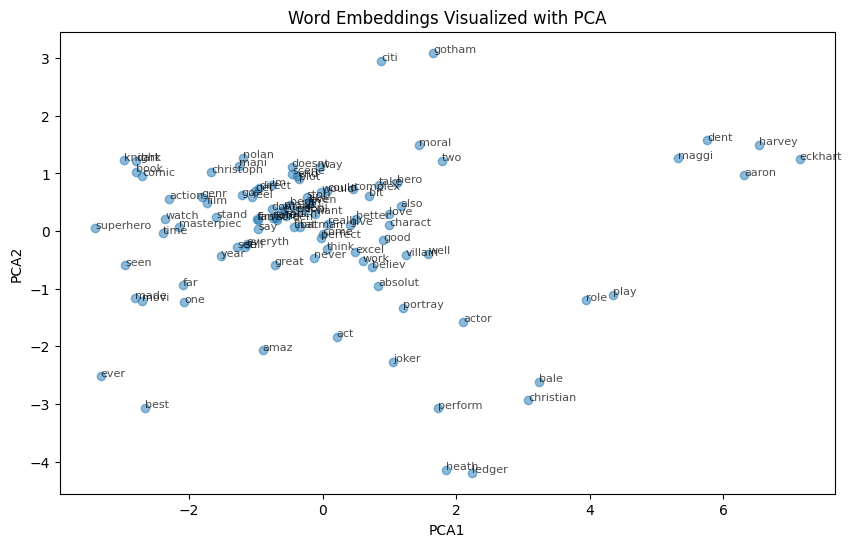

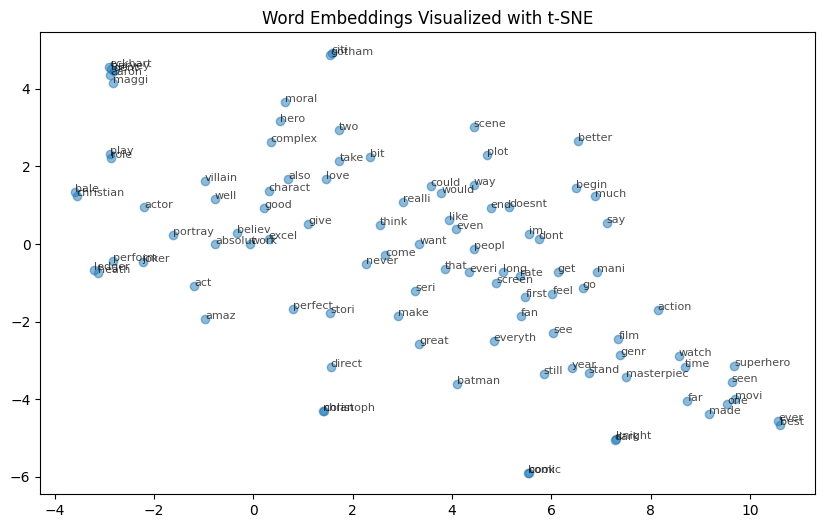

Cosine similarity between 'good' and 'great': 0.8468
One of the words 'bad' or 'terrible' is not in the vocabulary.
One of the words 'movie' or 'film' is not in the vocabulary.


In [7]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/cleaned_imdb_reviews (1).csv'
column_name = 'cleaned_review'  # Ensure this column exists in your dataset
data = pd.read_csv(file_path)

# Ensure 'cleaned_review' column exists
if column_name not in data.columns:
    raise ValueError(f"The dataset does not contain a '{column_name}' column.")

# Preprocess text: tokenize and lowercase
documents = data[column_name].dropna().map(simple_preprocess)

# Train a Word2Vec model
model = Word2Vec(sentences=documents, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec_model.model")
print("Word2Vec model trained and saved successfully.")

# Extract word vectors
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors[:100])  # Limit to 100 words for clarity
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
for i, word in enumerate(words[:100]):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.7)
plt.title('Word Embeddings Visualized with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(word_vectors[:100])
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
for i, word in enumerate(words[:100]):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("Word Embeddings Visualized with t-SNE")
plt.show()

# Cosine Similarity Function
def cosine_sim(word1, word2):
    if word1 in model.wv and word2 in model.wv:
        vec1 = model.wv[word1]
        vec2 = model.wv[word2]
        return cosine_similarity([vec1], [vec2])[0][0]
    else:
        return None

# Example word pairs
word_pairs = [("good", "great"), ("bad", "terrible"), ("movie", "film")]
for w1, w2 in word_pairs:
    similarity = cosine_sim(w1, w2)
    if similarity is not None:
        print(f"Cosine similarity between '{w1}' and '{w2}': {similarity:.4f}")
    else:
        print(f"One of the words '{w1}' or '{w2}' is not in the vocabulary.")


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



I have selected the sentiment analysis NLP task to perform on cleaned_indb_reviews (1) dataset.
I have used a three-class sentiment labelling schema that is common for sentiment analysis tasks. I have used the following labels:
Positive - this review expresses a favourable opinion about the movie
Negative - this review contains criticism or an unfavourable opinion
Neutral - this review does not show a strong positive or negative sentiment.

Below is the github link for the sentiment analysis file:

I have selected the sentiment analysis NLP task to perform on cleaned_indb_reviews (1) dataset.
I have used a three-class sentiment labelling schema that is common for sentiment analysis tasks. I have used the following labels:

**Positive** - this review expresses a favourable opinion about the movie

**Negative** - this review contains criticism or an unfavourable opinion

**Neutral** - this review does not show a strong positive or negative sentiment.



In [8]:
# Below is the github link for the sentiment analysis file
#Link : https://github.com/Priyanka22062001/Priyanka_INFO5731_Spring2025/blob/main/Sentiment_analysis_of_cleaned_reviews.csv

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

I found this assignment very informative as it involves real-world NLP tasks like sentiment analysis and word embeddding tasks. The only thing I find is struggling to select the correct dataset that will be suitable for all the given questions. As after seeing the questions, I thought of using only onne dataset for all the questions so as to understand the concepts clearly. And I really emjoyed visulizing the embeddings using PCA and t-SNE and exploring cosine similarity for my dataset.